# **Hate Speech Detection Project**

The code is divided into the following 8 steps:


1.   Import Libraries
2.   Load Dataset
3.   Preprocessing
1.   Vectorization
1.   Model Training
2.   Evaluation

# **Extras** #
1.   Additional Stats
2.   Model testing on sample text outside csv file
3.   Finding total hate and offensive tweets








In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()



from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Step 2: Load Dataset
df = pd.read_csv('labeled_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [ ]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [ ]:
# Step 3: Preprocessing
label_mapping = {
    0: 'hate speech',
    1: 'offensive',
    2: 'neither'
}

df['label'] = df['class'].map(label_mapping)
df[['tweet','label']].head()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    tokens = text.split()
    filtered_words = [stemmer.stem(word) for word in tokens if word not in english_stopwords]
    return " ".join(filtered_words)

df['clean_text'] = df['tweet'].apply(clean_text)
df['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [ ]:
# Step 4: Vectorization
X = df['clean_text']
y = df['class']  # 0 = hate speech, 1 = offensive language, 2 = neither

count_vec = CountVectorizer()
X_counts = count_vec.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Model Training
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

Accuracy Score: 0.868065362114182

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.31      0.31       290
           1       0.92      0.92      0.92      3832
           2       0.81      0.81      0.81       835

    accuracy                           0.87      4957
   macro avg       0.68      0.68      0.68      4957
weighted avg       0.87      0.87      0.87      4957



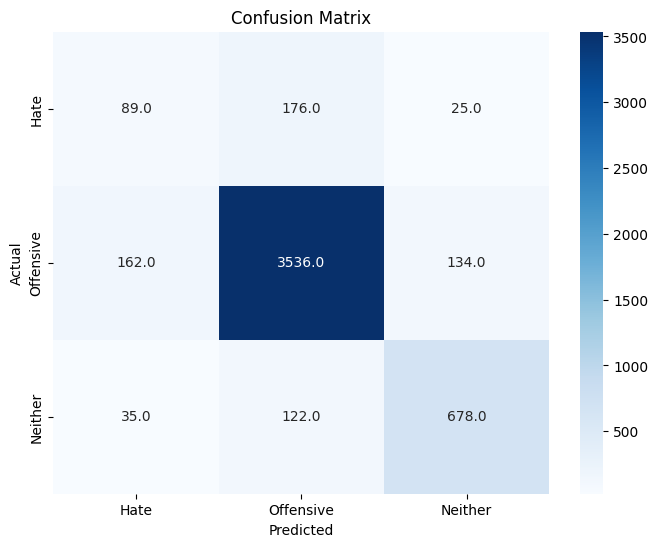

In [ ]:
# Step 6: Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt=".1f", cmap="Blues",
            xticklabels=['Hate', 'Offensive', 'Neither'],
            yticklabels=['Hate', 'Offensive', 'Neither'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Total tweets in dataset: 24783
Number of tweets with no hate speech (class=2): 4163
Average number of no hate speech tweets (class=2) per 100 tweets: 16.80
Number of offensive tweets (class=1): 19190
Average number of offensive tweets (class=1) per 100 tweets: 77.43
Number of hate speech tweets (class=0): 1430
Average number of hate speech tweets (class=0) per 100 tweets: 5.77






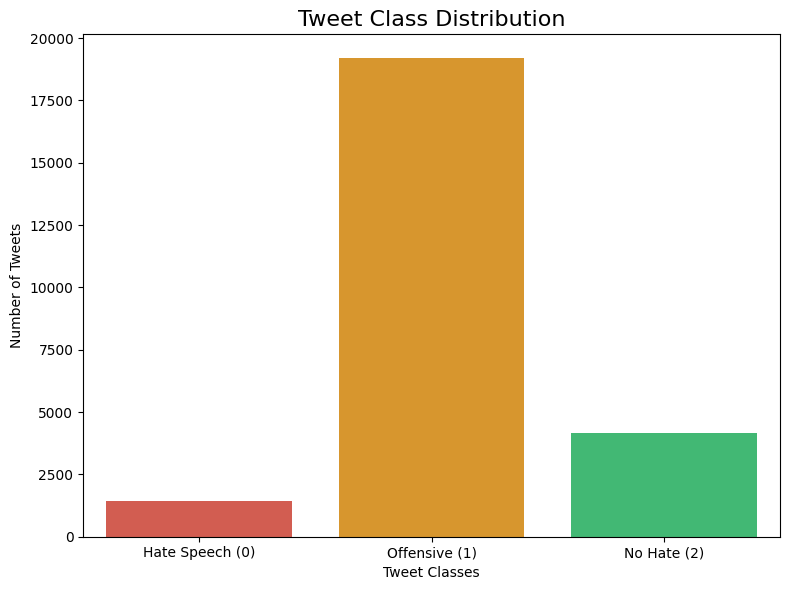

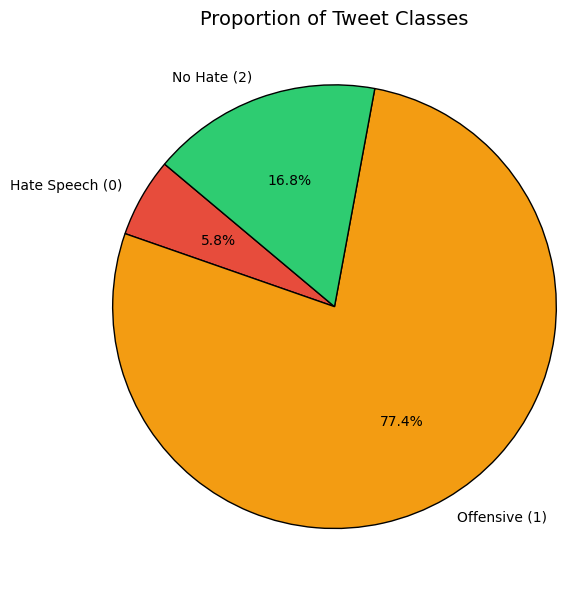

In [ ]:
# Extra 1: Additional Stats

total_tweets = len(df)

no_hate_tweets = (df['class'] == 2).sum()
offensive_tweets = (df['class'] == 1).sum()
hate_tweets = (df['class'] == 0).sum()

avg_no_hate_per_100 = (no_hate_tweets / total_tweets) * 100
avg_offensive_per_100 = (offensive_tweets / total_tweets) * 100
avg_hate_per_100 = (hate_tweets / total_tweets) * 100


print(f"\nTotal tweets in dataset: {total_tweets}")
print(f"Number of tweets with no hate speech (class=2): {no_hate_tweets}")
print(f"Average number of no hate speech tweets (class=2) per 100 tweets: {avg_no_hate_per_100:.2f}")
print(f"Number of offensive tweets (class=1): {offensive_tweets}")
print(f"Average number of offensive tweets (class=1) per 100 tweets: {avg_offensive_per_100:.2f}")
print(f"Number of hate speech tweets (class=0): {hate_tweets}")
print(f"Average number of hate speech tweets (class=0) per 100 tweets: {avg_hate_per_100:.2f}")
print("\n")
print("\n")

# Prepare DataFrame for plotting
class_labels = ['Hate Speech (0)', 'Offensive (1)', 'No Hate (2)']
tweet_counts = [hate_tweets, offensive_tweets, no_hate_tweets]
avg_percentages = [avg_hate_per_100, avg_offensive_per_100, avg_no_hate_per_100]
colors = ['#e74c3c', '#f39c12', '#2ecc71']

count_df = pd.DataFrame({
    'Tweet Class': class_labels,
    'Count': tweet_counts,
    'Color': colors
})

percent_df = pd.DataFrame({
    'Tweet Class': class_labels,
    'Percentage per 100': avg_percentages,
    'Color': colors
})

# Bar Chart - Count of each class
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x='Tweet Class', y='Count', hue='Tweet Class', palette=colors, legend=False)
plt.title('Tweet Class Distribution', fontsize=16)
plt.ylabel('Number of Tweets')
plt.xlabel('Tweet Classes')
plt.tight_layout()
plt.show()
print("\n")
print("\n")

# Pie Chart - Percentage distribution
plt.figure(figsize=(6, 6))
plt.pie(tweet_counts, labels=class_labels, colors=colors, autopct='%1.1f%%',
        startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Tweet Classes', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()
print("\n")
print("\n")



In [ ]:
# Extra 2: Model testing with sample text outside the csv file
sample1 = "@@ People against God should be killed. "
sample2 = "India is a secular, democratic country. Jai Hind!"

sample1 = clean_text(sample1)
sample2 = clean_text(sample2)
print(sample1)
print(sample2)

peopl god kill
india secular democrat countri jai hind


In [ ]:
data1 = count_vec.transform([sample1]).toarray()
data2 = count_vec.transform([sample2]).toarray()
print(data1)
print(data2)

[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [ ]:
Res1 = model.predict(data1)
Res2 = model.predict(data2)
print(Res1,'\n',Res2)

[0] 
 [2]


In [ ]:
print(label_mapping[Res1[0]])
print(label_mapping[Res2[0]])

hate speech
neither


In [ ]:
# Extra 4: Username Flagging Summary (Sorted)
def extract_username(tweet):
    if pd.isnull(tweet):
        return None
    search_area = tweet[:len(tweet)//2]
    match = re.search(r'@([^\s@:]+):', search_area)
    if match:
        return match.group(1)
    return None

df['username'] = df['tweet'].apply(extract_username)
df_usernames = df[df['username'].notnull()]

hate_counts = df_usernames[df_usernames['class'] == 0].groupby('username').size().rename("Hate")
offensive_counts = df_usernames[df_usernames['class'] == 1].groupby('username').size().rename("Offensive")

summary = pd.concat([hate_counts, offensive_counts], axis=1).fillna(0).astype(int)
summary['Total'] = summary['Hate'] + summary['Offensive']
summary = summary.reset_index()

# Sort by Total (ascending)
summary = summary.sort_values(by='Total', ascending=False)

# Display the summary table
print("\nFlagged User Summary:\n")
print(summary)


Flagged User Summary:

             username  Hate  Offensive  Total
782     CauseWereGuys     0         25     25
253   iDntWearCondoms     1         23     24
1627        JoeBudden     0         23     23
73     FunnyPicsDepot     3         17     20
1220  FriendlyAssh0le     0         20     20
...               ...   ...        ...    ...
1884    LiloNoSnitch_     0          1      1
1883         Lilbyrdy     0          1      1
1882      Lil_Mike_12     0          1      1
1881         LilTy___     0          1      1
1890   Lipstickjovie_     0          1      1

[5079 rows x 4 columns]


In [ ]:
most_hate_user = summary.loc[summary['Hate'].idxmax()]
most_offensive_user = summary.loc[summary['Offensive'].idxmax()]
print("Most number hate tweets by " + f"{most_hate_user['username']} - {most_hate_user['Hate']} hate tweets")
print("Most number hate tweets by "f"{most_offensive_user['username']} - {most_offensive_user['Offensive']} offensive tweets")

Most number hate tweets by FunnyPicsDepot - 3 hate tweets
Most number hate tweets by CauseWereGuys - 25 offensive tweets
